In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
df = pd.read_csv('../cleaned_data.csv',index_col=0)

In [3]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,0,0,0,1,1,0,0,0


In [4]:
X = df.drop('cnt', axis=1)

In [5]:
y = df['cnt']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [14]:
ridge = linear_model.Ridge(alpha = 0.5)

In [15]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=3, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [16]:
y_pred = ridge.predict(X_test)

In [25]:
ridge.score(X_test, y_test)

0.6806803026880833

In [34]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

10090.127871418086

In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

74.4527649922887

In [23]:
cv_scores = []

for n in range(1,10):
    ridge = linear_model.Ridge(alpha = n)
    scores = ridge.fit(X_train,y_train).score(X_test, y_test)
    cv_scores.append(scores.mean())

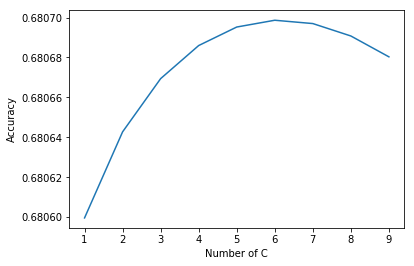

In [24]:
plt.plot(range(1,10), cv_scores)
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.show()